# 3. Credit Card Fraud Detection

#### Aim: 
     The challenge is to recognize fraudulent credit card transactions so that the customers of credit card companies are not charged for items that they did not purchase.

In [1]:
# Libraries for exploring, handling and visualizing data
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns, plotly.express as px
# Sklearn's preprocessing library
from sklearn.preprocessing import StandardScaler
# Importing train and test data split
from sklearn.model_selection import train_test_split
# Sklearn's metrics to evaluate our models
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score, f1_score
# Classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression


# Setting theme style and color palette to seaborn 
sns.set_theme(context = 'notebook', style='darkgrid',palette='muted')

In [2]:
df = pd.read_csv('creditcard.csv.zip')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.shape

(284807, 31)

In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
df.isnull().sum().sum()

0

In [8]:
#There are no null values in any of the columns of the dataset.

In [9]:
# Statistics on the amounts
df.Amount.describe().round(2)

count    284807.00
mean         88.35
std         250.12
min           0.00
25%           5.60
50%          22.00
75%          77.16
max       25691.16
Name: Amount, dtype: float64

In [10]:
#75% of transactions in the analyzed period were up to €77.16.

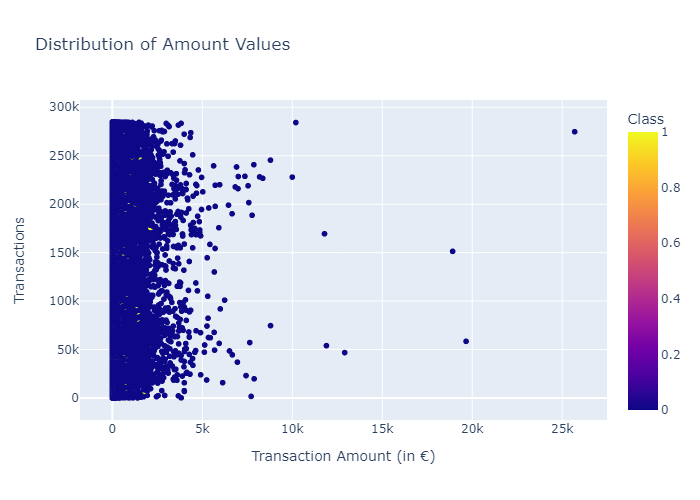

In [11]:
# Distribution of Amounts
fig = px.scatter(df, x = 'Amount', y =df.index, color = df.Class,
                title = 'Distribution of Amount Values')
fig.update_layout(xaxis_title='Transaction Amount (in €)',
                    yaxis_title='Transactions')
fig.show('png')

It looks like most transactions are genuine, represented by the blue dots on the chart above. We can also see that all high value transactions were genuine, with apparently no fraudulent transaction made being above €5,000.00

However, it seems hard to identify the fraudulent transactions, painted yellow, looking at the distribution of amount values.

In [12]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [13]:
#So it seems only 492 transactions in the dataset were fraudulent which represents only 0.173% of data, there is a huge class imbalance that we have to work on here!

Class
0    99.827251
1     0.172749
Name: Class, dtype: float64


<Axes: ylabel='Class'>

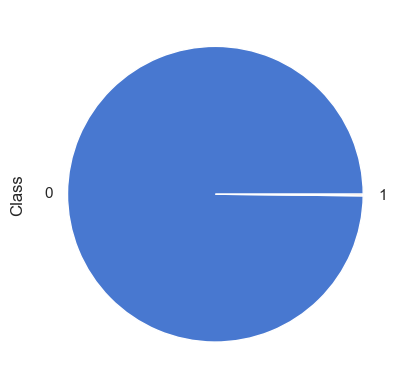

In [14]:
# checking the class distribution of target variable in percentage
print((df.groupby('Class')['Class'].count()/df['Class'].count())*100)
((df.groupby('Class')['Class'].count()/df['Class'].count())*100).plot.pie()

In [15]:
#Let's see some statistics on the amounts of the frauds registered during the analyzed period.
df.query("Class ==1").Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [16]:
#75% percent of frauds were below the amount of €105.89 and the largest fraud amount was €2,125.87. Let's see those values distributed in a chart.

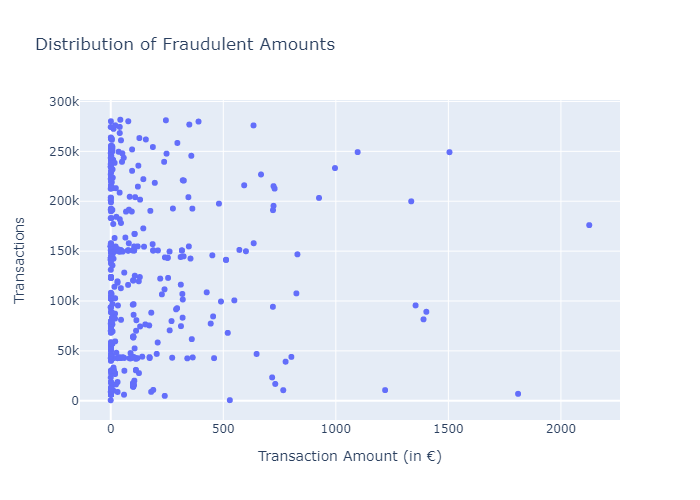

In [17]:
# Distribution of fraudulent transactions amount
fig = px.scatter(df.query("Class==1"), x = 'Amount', y =df.query("Class==1").index,
                title = 'Distribution of Fraudulent Amounts')
fig.update_layout(xaxis_title='Transaction Amount (in €)',
                    yaxis_title='Transactions')
fig.show('png')

In [18]:
df = df.drop(columns = ['Time'], axis = 1)
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [19]:
X = df.drop(columns=['Class'], axis=1)
y = df.Class

In [20]:
y

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

In [21]:
train_x,test_x,train_y,test_y=train_test_split(X,y,test_size=0.2,random_state=11)

In [22]:
# Scaling data on the training set
scaler = StandardScaler()
train_x['Amount'] = scaler.fit_transform(train_x.Amount.values.reshape(-1,1))
train_x

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
239362,0.920413,-2.970441,-4.655090,-1.406093,1.960665,2.832219,0.791964,0.209397,-1.299305,0.629610,...,1.441869,0.903597,0.977804,-0.812170,0.842426,0.544033,0.245545,-0.209287,0.023384,2.546309
135799,-1.422210,0.258039,0.949196,0.040256,1.723840,4.240365,-0.612317,1.157709,0.056066,0.367449,...,0.474035,0.168868,0.580690,-0.264771,1.023452,0.454606,-0.030039,0.339882,0.386827,0.047294
191521,1.980967,-2.031344,-1.407374,-1.248925,-1.307496,-0.367073,-0.867281,-0.124114,-0.982321,1.578959,...,-0.228710,0.010003,0.389829,-0.154765,-0.311849,0.193717,0.116519,-0.034259,-0.055471,0.316388
164003,-0.871047,0.978812,-1.060331,1.065148,1.239743,-1.480084,0.847986,0.044488,-0.922613,0.171673,...,-0.150202,0.335309,0.940728,-0.342935,1.177850,-0.436098,-0.455660,0.337983,0.047544,-0.342792
200163,1.941643,-0.038282,-0.966428,0.960146,0.327545,0.180164,-0.135851,0.120205,0.303787,0.372858,...,-0.211664,-0.403067,-1.253887,0.454875,0.091459,-0.429933,-1.204608,0.015728,-0.035624,-0.265503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161441,2.163327,-1.780573,0.091251,-1.389120,-2.234089,-0.550766,-1.817972,0.020573,-0.477370,1.511486,...,-0.408374,-0.096320,0.135617,0.325616,-0.008146,-0.605702,-0.238083,0.052944,-0.024683,-0.155033
57676,-0.824972,0.328005,0.173963,0.980225,2.223494,-0.198765,0.544855,-0.204458,-0.451076,-0.583450,...,0.190317,-0.089006,0.041972,-0.005203,-1.442658,0.400063,-0.179830,-0.207127,-0.117970,-0.353313
102327,0.982454,-0.184900,1.372894,1.333391,-1.075945,-0.223225,-0.522126,0.001133,0.432789,-0.086015,...,0.164637,0.322639,0.845794,-0.163791,0.445965,0.373493,-0.253170,0.066588,0.062611,0.047294
203867,-1.582927,-0.950364,0.580318,-0.908516,-0.938009,-0.137553,2.067949,-0.263479,-1.622124,-0.239279,...,0.726663,0.016576,-0.168016,0.618106,-0.121142,1.036627,0.603206,0.074864,0.140916,1.491905


In [23]:
# Scaling data on the testing set
scaler = StandardScaler()
test_x['Amount'] = scaler.fit_transform(test_x.Amount.values.reshape(-1,1))
test_x

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
38710,1.256599,-0.459633,0.034343,-0.679387,-0.540739,-0.788283,-0.043170,-0.284879,-1.281635,0.519989,...,0.252660,-0.120414,-0.541204,0.083329,0.081405,0.292899,-0.511416,-0.004071,0.025408,-0.032656
252425,-1.463177,0.755733,1.148214,0.491549,1.216403,0.562360,0.523490,0.378477,-1.819088,0.388522,...,-0.084392,-0.122225,-0.359679,0.095992,0.175585,0.371695,2.229715,-0.527741,-0.329794,-0.291525
251320,-2.231241,0.378645,0.244558,-2.323649,-1.106478,-0.325771,-0.719739,0.820389,-0.612119,0.322343,...,-0.512527,0.089804,-0.075685,0.082920,-0.446963,-0.439551,-0.631648,-0.586523,0.031298,-0.181498
80239,-0.378529,0.684139,0.918082,0.862886,0.969763,0.764045,0.554953,0.191015,-0.199820,-0.375597,...,0.029285,-0.069716,-0.053133,-0.279469,-1.322809,0.086468,-0.196109,0.158715,0.125476,-0.249577
209783,1.930906,0.710091,-0.757991,3.730161,0.512661,-0.492584,0.434969,-0.306465,-1.312444,1.510030,...,-0.196090,0.248510,0.764477,0.040288,0.068275,0.161119,0.124702,-0.040235,-0.047636,-0.283043
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252187,-0.218781,0.966675,0.046827,-0.854698,0.684372,-0.509887,0.882845,-0.011984,-0.124844,0.052571,...,0.121285,-0.257244,-0.508945,0.033652,-0.470056,-0.417944,0.154936,0.354200,0.144991,-0.327895
122566,1.195271,0.198909,0.496790,0.569411,-0.457380,-0.822868,0.046626,-0.104967,-0.271872,0.105942,...,-0.074418,-0.132478,-0.417243,0.085563,0.545486,0.262644,0.142160,-0.039205,0.008598,-0.301916
222076,1.979479,-0.494730,-0.596431,0.180057,-0.265259,0.425062,-0.783129,0.223946,1.264250,0.002624,...,-0.175593,0.202478,0.759427,0.078977,0.212561,-0.043898,-0.233072,0.030939,-0.045223,-0.299929
233740,2.072601,-0.169893,-1.165646,0.150432,0.120419,-0.468132,-0.062591,-0.207555,0.631411,0.029723,...,-0.104429,-0.042515,0.036454,0.191641,0.538720,-0.115481,0.535193,-0.068240,-0.054121,-0.299891


In [24]:
y.value_counts() # 0 = Genuine Transactions | 1 = Fraud

Class
0    284315
1       492
Name: count, dtype: int64

In [25]:
# The data is highly Unbalanced

In [26]:
# Under Sampling

In [27]:
normal= df[df['Class']==0]
fraud=df[df['Class']==1]

In [28]:
print(normal.shape)
print(fraud.shape)

(284315, 30)
(492, 30)


In [29]:
normal_sample=normal.sample(n=473)

In [30]:
normal_sample.shape

(473, 30)

In [31]:
new_df=pd.concat([normal_sample,fraud],ignore_index=True)

In [32]:
new_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,2.043362,0.280251,-1.345844,0.742671,0.230159,-1.132206,0.095758,-0.344153,1.759149,-0.746097,...,-0.482911,-1.043790,0.417335,0.988234,-0.353202,0.101502,-0.089256,-0.032005,0.89,0
1,2.075610,0.157644,-1.968520,0.111451,0.958874,-0.026022,0.125852,-0.078159,0.119068,-0.248548,...,-0.342782,-0.854923,0.230428,-0.273124,-0.168802,0.201156,-0.057229,-0.046295,1.79,0
2,1.728726,-1.564151,-0.668149,-0.579598,-1.040449,-0.163482,-0.856190,-0.229151,1.238065,0.253197,...,0.383754,0.878302,-0.064268,0.591817,-0.232860,-0.156942,-0.054203,-0.002298,250.00,0
3,-1.526796,0.008011,2.987505,1.022378,-0.337232,0.625831,0.239155,-0.081407,0.761826,1.330511,...,0.068292,1.076109,-0.167451,0.191778,0.118458,-0.100196,0.125118,-0.250682,100.00,0
4,0.455328,-1.751929,-1.174185,-1.125440,-0.507916,-0.747749,0.891286,-0.464275,1.189083,-1.333267,...,0.197563,-0.267902,-0.734039,-0.491805,0.793412,0.102598,-0.104110,0.079146,499.00,0


In [33]:
new_df['Class'].value_counts()

Class
1    492
0    473
Name: count, dtype: int64

In [34]:
X=new_df.drop('Class',axis=1)
y=new_df['Class']

In [35]:
X_train,X_test, y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 11)

In [37]:
import warnings
warnings.filterwarnings('ignore')

In [38]:
# Applying  Logistic Regression
model1=LogisticRegression()
model1.fit(X_train,y_train)

y_predictions_lr = model1.predict(test_x)

# Applying Decision Tree Classifier 
model2 = DecisionTreeClassifier()
model2.fit(train_x,train_y)

y_predictions_dt = model2.predict(test_x)



In [39]:
# Logistic Regression score
# Printing Evaluation Metrics for LR
metrics = [['Accuracy',(accuracy_score(test_y, y_predictions_lr))],
                         ['Precision',precision_score(test_y, y_predictions_lr)],
                         ['Recall', recall_score(test_y, y_predictions_lr)],
                         ['F1_score',f1_score(test_y, y_predictions_lr)]]
metrics_df = pd.DataFrame(metrics, columns = ['Metrics', 'Results'])
metrics_df


,Metrics,Results
0,Accuracy,0.954303
1,Precision,0.036073
2,Recall,0.898148
3,F1_score,0.069360


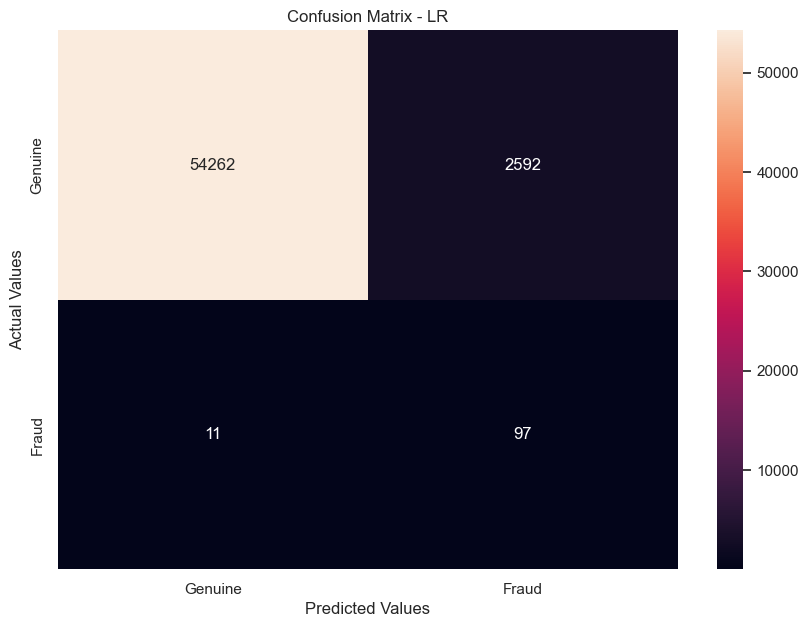

In [40]:
# Confusion Matrix for LR
confusion_matrix_lr = confusion_matrix(test_y, y_predictions_lr)
# Visualization
plt.figure(figsize=(10,7))
ax = plt.subplot()
sns.heatmap(confusion_matrix_lr, annot=True, fmt='g', ax = ax)
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')
ax.set_title('Confusion Matrix - LR')
ax.xaxis.set_ticklabels(['Genuine','Fraud'])
ax.yaxis.set_ticklabels(['Genuine','Fraud'])
plt.show()

In [41]:
# Decision tree score
# Printing Evaluation Metrics for Decision Tree
metrics_df = [['Accuracy',(accuracy_score(test_y, y_predictions_dt))],
                         ['Precision',precision_score(test_y, y_predictions_dt)],
                         ['Recall', recall_score(test_y, y_predictions_dt)],
                         ['F1_score',f1_score(test_y, y_predictions_dt)]]
metrics_df_dt = pd.DataFrame(metrics_df, columns = ['Metrics', 'Results'])
metrics_df_dt

,Metrics,Results
0,Accuracy,0.999333
1,Precision,0.872340
2,Recall,0.759259
3,F1_score,0.811881


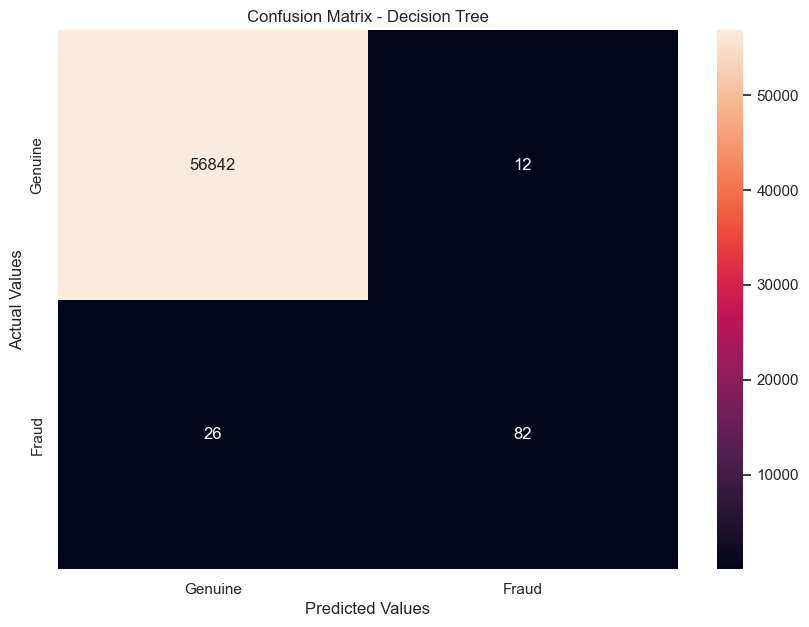

In [42]:
# Confusion Matrix for Decision Tree
confusion_matrix_dt = confusion_matrix(test_y, y_predictions_dt)
# Visualization
plt.figure(figsize=(10,7))
ax = plt.subplot()
sns.heatmap(confusion_matrix_dt, annot=True, fmt='g', ax = ax)
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')
ax.set_title('Confusion Matrix - Decision Tree')
ax.xaxis.set_ticklabels(['Genuine','Fraud'])
ax.yaxis.set_ticklabels(['Genuine','Fraud'])
plt.show()

In [43]:
# Over Sampling

In [53]:
!pip uninstall imblearn --yes

Found existing installation: imblearn 0.0
Uninstalling imblearn-0.0:
  Successfully uninstalled imblearn-0.0


In [54]:
!pip install scikit-learn==1.2.2

In [55]:
!pip install imblearn

ERROR: Could not find a version that satisfies the requirement imblearn (from versions: none)
ERROR: No matching distribution found for imblearn


In [44]:
from imblearn.over_sampling import SMOTE
train_x, train_y = SMOTE().fit_resample(train_x,train_y) # Reshaping data

In [45]:
train_y.value_counts()

Class
0    227461
1    227461
Name: count, dtype: int64

In [46]:
# Applying  Logistic Regression
model1=LogisticRegression()
model1.fit(X_train,y_train)

y_predictions_lr = model1.predict(test_x)

# Applying Decision Tree Classifier 
model2 = DecisionTreeClassifier()
model2.fit(train_x,train_y)

y_predictions_dt = model2.predict(test_x)

In [47]:
# Logistic Regression score
# Printing Evaluation Metrics for LR
metrics = [['Accuracy',(accuracy_score(test_y, y_predictions_lr))],
                         ['Precision',precision_score(test_y, y_predictions_lr)],
                         ['Recall', recall_score(test_y, y_predictions_lr)],
                         ['F1_score',f1_score(test_y, y_predictions_lr)]]
metrics_df = pd.DataFrame(metrics, columns = ['Metrics', 'Results'])
metrics_df

,Metrics,Results
0,Accuracy,0.954303
1,Precision,0.036073
2,Recall,0.898148
3,F1_score,0.069360


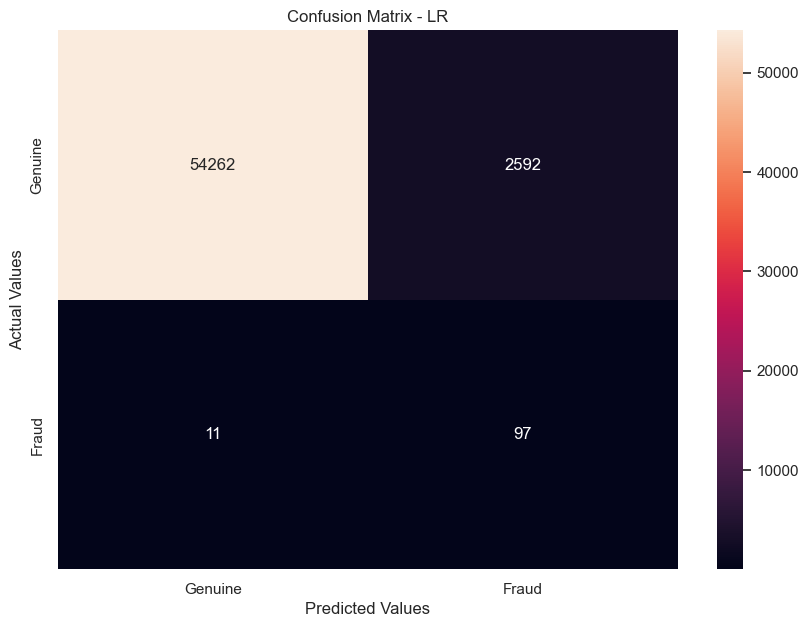

In [48]:
# Confusion Matrix for LR
confusion_matrix_lr = confusion_matrix(test_y, y_predictions_lr)
# Visualization
plt.figure(figsize=(10,7))
ax = plt.subplot()
sns.heatmap(confusion_matrix_lr, annot=True, fmt='g', ax = ax)
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')
ax.set_title('Confusion Matrix - LR')
ax.xaxis.set_ticklabels(['Genuine','Fraud'])
ax.yaxis.set_ticklabels(['Genuine','Fraud'])
plt.show()

In [49]:
# Decision tree score
# Printing Evaluation Metrics for Decision Tree
metrics_df = [['Accuracy',(accuracy_score(test_y, y_predictions_dt))],
                         ['Precision',precision_score(test_y, y_predictions_dt)],
                         ['Recall', recall_score(test_y, y_predictions_dt)],
                         ['F1_score',f1_score(test_y, y_predictions_dt)]]
metrics_df_dt = pd.DataFrame(metrics_df, columns = ['Metrics', 'Results'])
metrics_df_dt

,Metrics,Results
0,Accuracy,0.997946
1,Precision,0.473373
2,Recall,0.740741
3,F1_score,0.577617


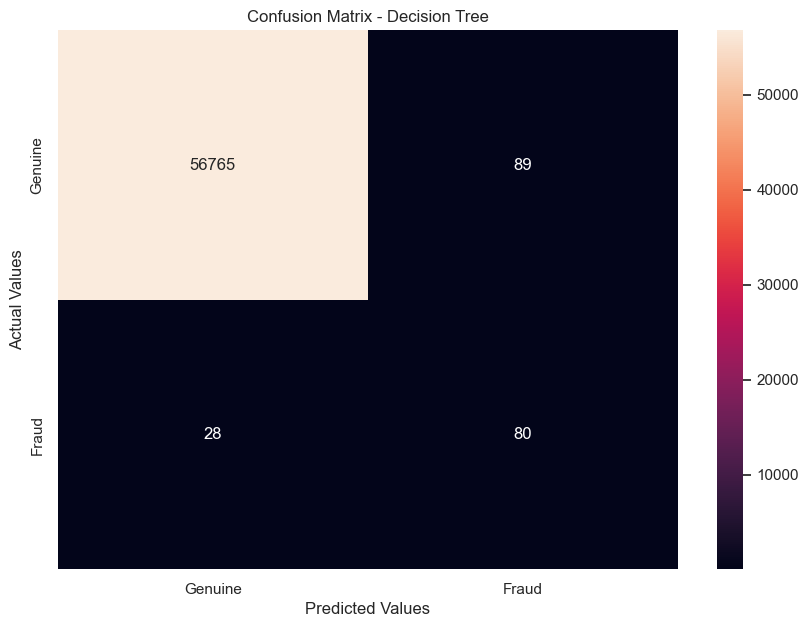

In [50]:
# Confusion Matrix for Decision Tree
confusion_matrix_dt = confusion_matrix(test_y, y_predictions_dt)
# Visualization
plt.figure(figsize=(10,7))
ax = plt.subplot()
sns.heatmap(confusion_matrix_dt, annot=True, fmt='g', ax = ax)
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')
ax.set_title('Confusion Matrix - Decision Tree')
ax.xaxis.set_ticklabels(['Genuine','Fraud'])
ax.yaxis.set_ticklabels(['Genuine','Fraud'])
plt.show()

In [52]:
# Printing ROC AUC scores
from sklearn.metrics import roc_auc_score
print('Logistic Regression ROC AUC Score: ', (roc_auc_score(test_y, y_predictions_lr) * 100).round(2))
print('Decision Tree ROC AUC Score: ', (roc_auc_score(test_y, y_predictions_dt) *100).round(2))


Logistic Regression ROC AUC Score:  92.63
Decision Tree ROC AUC Score:  86.96
